<a href="https://colab.research.google.com/github/suryogumilar/tensorflow_playground/blob/main/C2_W1_Lab_1_cats_vs_dogs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Generator and Image dataset from directory

test about tensorflow keras Image Data generator and Image dataset from directory

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:

import zipfile
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory # 'tis a function
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files

Download the dataset and unzip

In [ ]:

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-06 08:13:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  22.7MB/s    in 2.9s    

2022-12-06 08:13:06 (22.7 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'train', 'vectorize.py']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('base dir is:', base_dir)
print('')

print('train dir is :', train_dir)
print('validation dir is :', validation_dir)

print('')
print('train cats dir is:', train_cats_dir)
print('train dogs dir is:', train_dogs_dir)

print()
print('validation cats dir:', validation_cats_dir)
print('validation dogs dir:', validation_dogs_dir)

base dir is: cats_and_dogs_filtered

train dir is : cats_and_dogs_filtered/train
validation dir is : cats_and_dogs_filtered/validation

train cats dir is: cats_and_dogs_filtered/train/cats
train dogs dir is: cats_and_dogs_filtered/train/dogs

validation cats dir: cats_and_dogs_filtered/validation/cats
validation dogs dir: cats_and_dogs_filtered/validation/dogs


## Image data generator 

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
train_generator.class_mode

'binary'

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_generator.target_size

(150, 150)

In [ ]:
print('train batch size is:', train_generator.batch_size)
print('train dataset size:', len(train_generator.labels))

train batch size is: 20
train dataset size: 2000


## Image dataset from directory

In [ ]:
train_dataset = image_dataset_from_directory(train_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))
validation_dataset = image_dataset_from_directory(validation_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
print('class names:', train_dataset.class_names)

print('file paths len:', len(train_dataset.file_paths))
print('element spec:', train_dataset.element_spec)


class names: ['cats', 'dogs']
file paths len: 2000
element spec: (TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))


class names: ['cats', 'dogs']
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


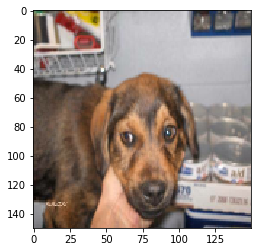

label is: [1.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


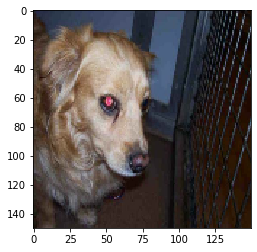

label is: [1.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


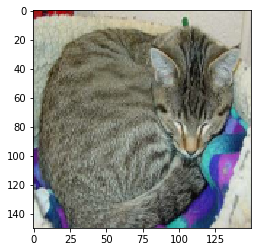

label is: [0.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


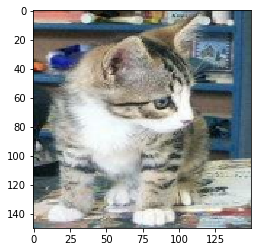

label is: [0.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


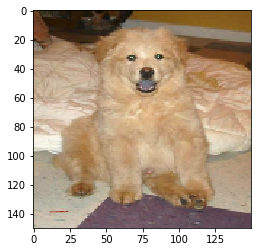

label is: [1.]


In [ ]:
from PIL import Image
print('class names:', train_dataset.class_names)
i = 0
for data_batch in train_dataset:
  print(type(data_batch))
  images, labels = data_batch
  print(type(images), type(labels))
  print(type(images[0]))
  for label in labels:
    print(images[0].shape)
    image_numpy = images[0].numpy()
    print(type(image_numpy))
    the_image = Image.fromarray(np.uint8(image_numpy))
    plt.imshow(the_image, interpolation='nearest')
    plt.show()
    print('label is:', label.numpy())
    break
  if(i>3):  
    break
  i=i+1

### rescaling in `image_dataset_from_directory()`

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

def change_inputs(images, labels):
  x = tf.image.resize(normalization_layer(images),[150, 150], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return x, x

normalized_tds = train_dataset.map(change_inputs)
normalized_vds = validation_dataset.map(change_inputs)

## simple model